# Setup

In [29]:
# Core Data Science Imports
import numpy as np
import pandas as pd

# Statistical Modeling (statsmodels)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

# Visualization
import matplotlib.pyplot as plt

# Configuration/Styles
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use('fivethirtyeight')

**1. Core Data Science Imports:**

*   `import numpy as np`:  Imports the NumPy library, which is fundamental for numerical computing in Python. It provides support for arrays, mathematical functions, and random number generation. `np` is a common alias used for brevity.
*   `import pandas as pd`: Imports the Pandas library, essential for data manipulation and analysis. It introduces DataFrames, which are tabular data structures with labeled rows and columns, making it easy to work with structured data.  `pd` is the standard alias.

**2. Statistical Modeling (statsmodels):**

This section imports modules from `statsmodels`, a Python library focused on statistical modeling, econometrics, and time series analysis.

*   `from statsmodels.graphics.tsaplots import plot_acf, plot_pacf`: Imports functions for plotting Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF). These plots are crucial for identifying the order of autoregressive (AR) and moving average (MA) components in time series models like ARIMA.
    *   `plot_acf()`:  Visualizes the autocorrelation between a time series and its lagged values.
    *   `plot_pacf()`: Visualizes the partial autocorrelation, which shows the correlation between a time series and its lagged values after removing the effects of intermediate lags.

*   `from statsmodels.tsa.seasonal import seasonal_decompose`: Imports `seasonal_decompose`, a function used to decompose a time series into its trend, seasonality, and residual components. This is helpful for understanding the underlying patterns in the data.

*   `from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt`:  Imports classes related to exponential smoothing methods:
    *   `SimpleExpSmoothing`: Implements simple exponential smoothing, a basic method for forecasting time series without trend or seasonality.
    *   `ExponentialSmoothing`: Implements double exponential smoothing (Holt's linear trend method), which handles data with a trend but no seasonality.
    *   `Holt`:  Implements Holt-Winters' seasonal method, which can handle both trend and seasonality in time series data.

**3. Visualization:**

*   `import matplotlib.pyplot as plt`: Imports the `pyplot` module from Matplotlib, a powerful library for creating static, interactive, and animated visualizations in Python. `plt` is the standard alias.

**4. Configuration/Styles:**

*   `import warnings`:  Imports the `warnings` module to manage warning messages that might be generated during code execution.
*   `warnings.simplefilter(action='ignore', category=FutureWarning)`: Suppresses `FutureWarning` messages. These warnings indicate that certain features or syntax are deprecated and will likely change in future versions of the libraries.  Ignoring them can make output cleaner, but it's generally good practice to address these warnings when possible for long-term code maintainability.
*   `plt.style.use('fivethirtyeight')`: Sets the default plotting style to 'fivethirtyeight'. This is a visually appealing style often used in data journalism and provides a consistent look for plots.  It's defined within Matplotlib.


In [30]:
class CFG:
    data_folder = './data/'
    img_dim1 = 20
    img_dim2 = 10

# Adjust parameters for displayed figures
plt.rcParams.update({'figure.figsize': (CFG.img_dim1, CFG.img_dim2)})

Define configuration class `CFG` and then use its attributes to adjust the default size of plots created with Matplotlib.  

**1. Class Definition:**

*   `class CFG:`: This defines a class named `CFG`.  Classes are blueprints for creating objects. In this case, `CFG` is used to hold configuration parameters related to the project. It's a common practice in Python projects to group related settings into a dedicated configuration object.
*   `data_folder = './data/'`: This defines an attribute of the `CFG` class called `data_folder`.  It stores the path to the directory where data files are located. The `./data/` means "a folder named 'data' in the current working directory."
*   `img_dim1 = 20`: Defines an attribute `img_dim1`, representing the desired width of images or figures (in this context, plots we will for visualization).  The value is set to 20.
*   `img_dim2 = 10`: Defines an attribute `img_dim2`, representing the desired height of images or figures. The value is set to 10.

**2. Adjusting Plot Size:**

*   `plt.rcParams`: This accesses the runtime configuration parameters of Matplotlib.  `rcParams` is a dictionary-like object that controls various aspects of how plots are rendered (colors, fonts, line styles, figure sizes, etc.).
*   `.update({'figure.figsize': (CFG.img_dim1, CFG.img_dim2)})`: This updates the dictionary with a new value:
    *   `'figure.figsize'`:  This key specifies the default size of figures created using Matplotlib. It expects a tuple representing (width, height) in inches.
    *   `(CFG.img_dim1, CFG.img_dim2)`: This provides the new figure size as a tuple.  It uses the values stored in the `img_dim1` and `img_dim2` attributes of the `CFG` class (which are 20 and 10 respectively).

# Exponential smoothing

## Single ES

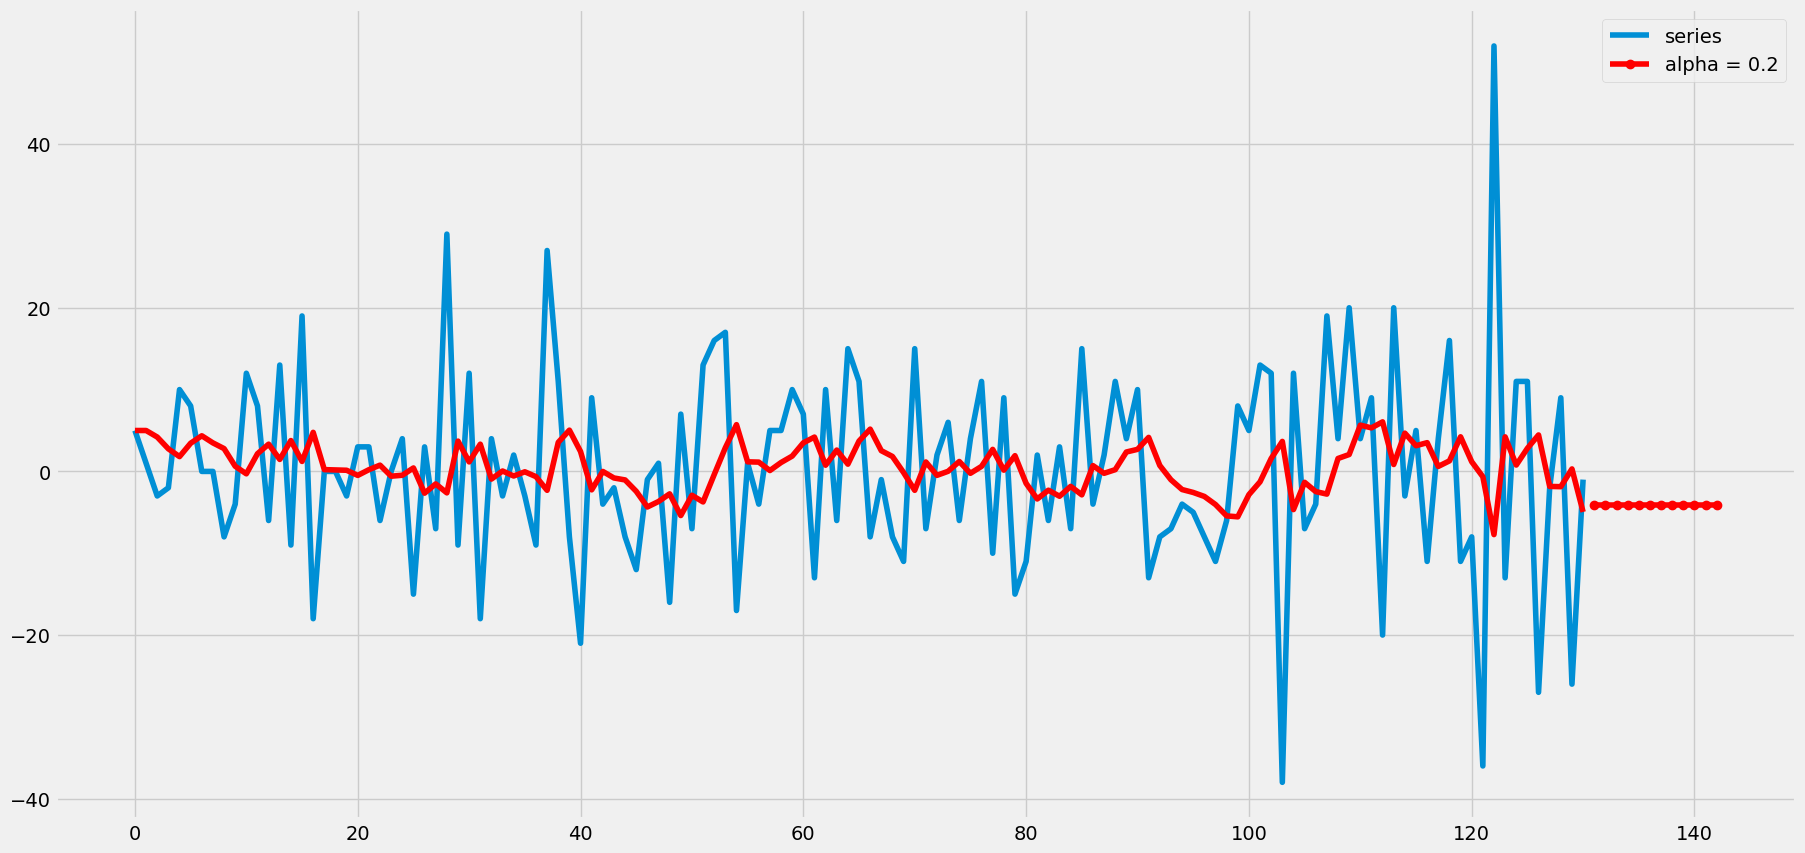

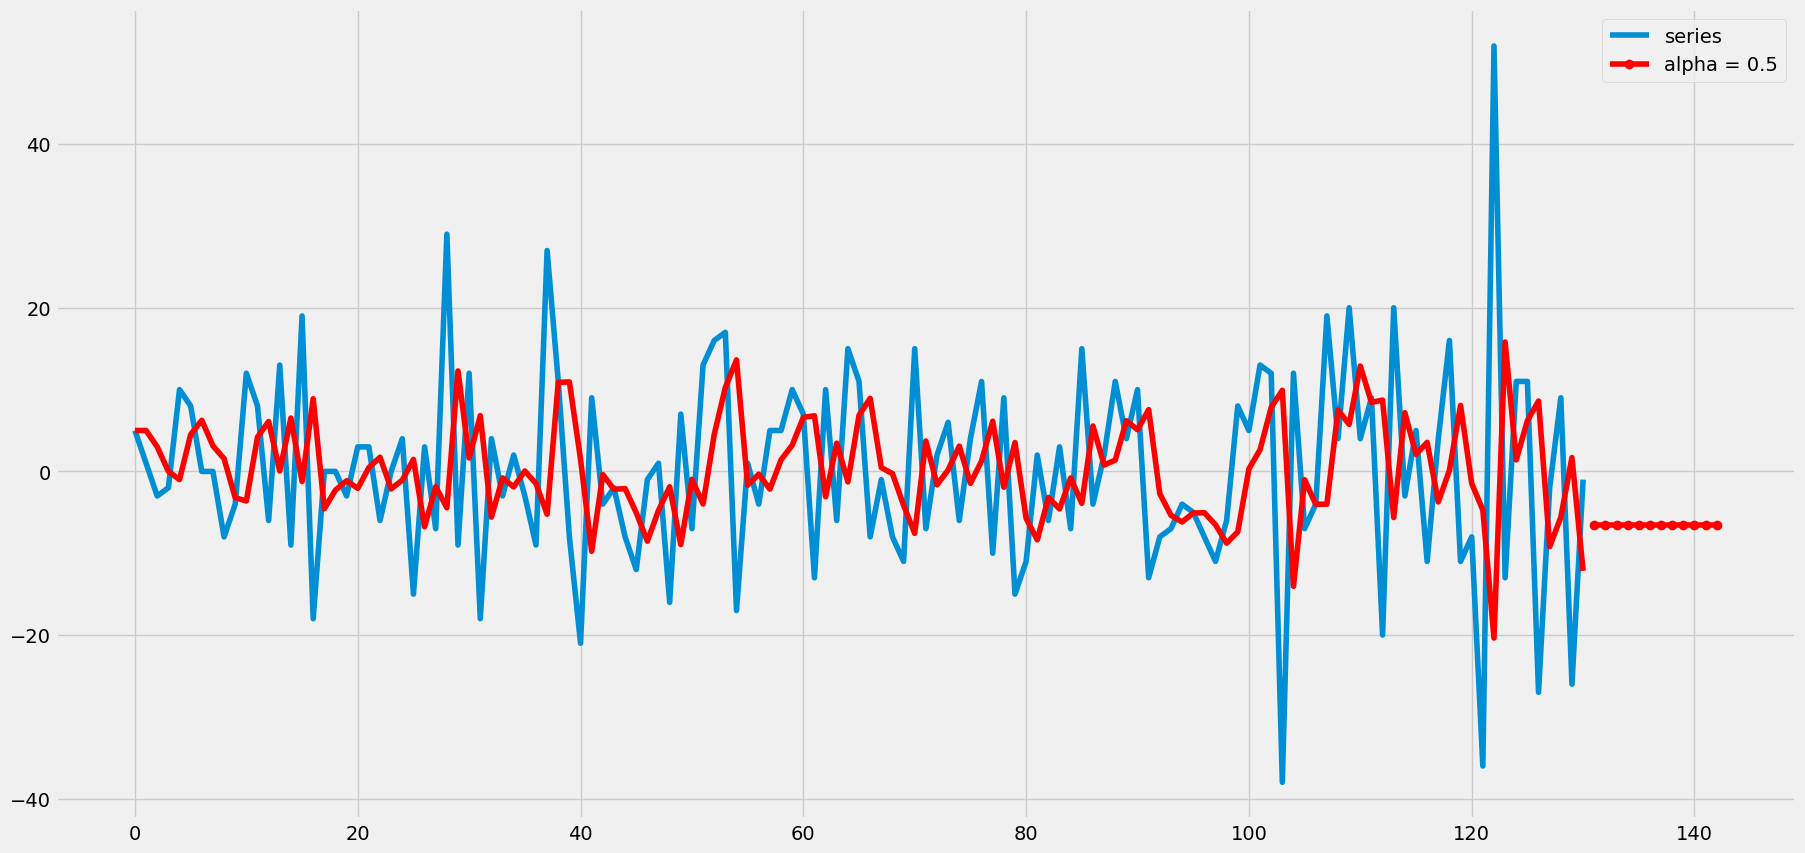

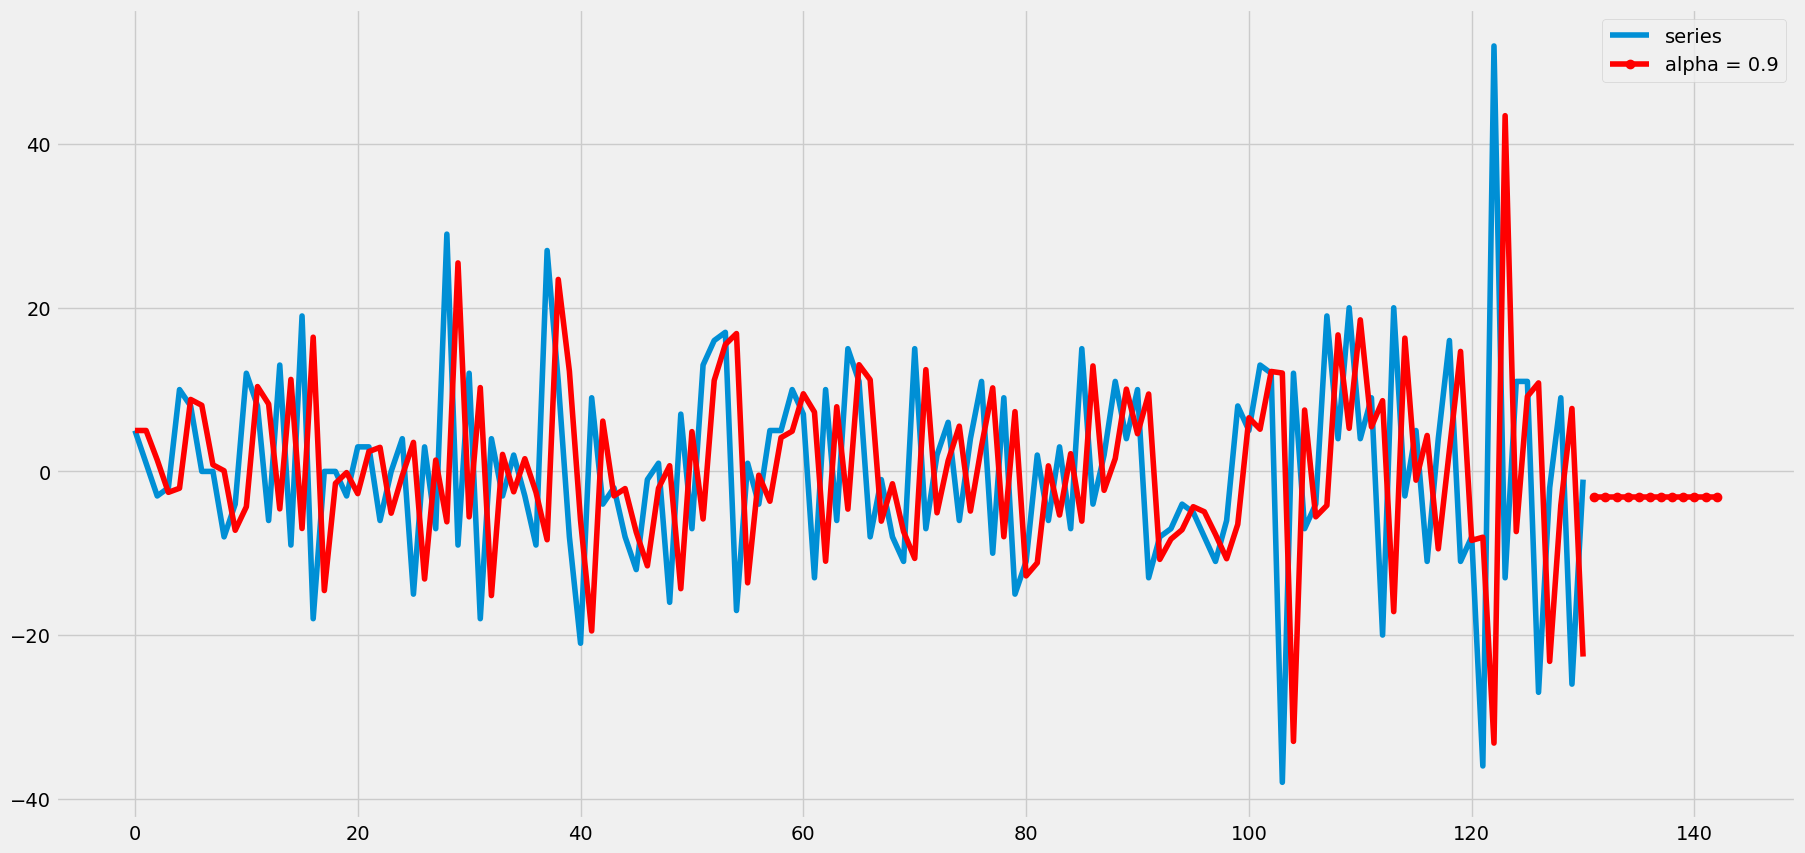

In [31]:
# synthetic data demonstration
for alpha_sm in [0.2 , 0.5, 0.9]:

    df = pd.read_csv(CFG.data_folder + 'exp1.csv', header = None); df.columns = ['series']
    df.plot.line()
    fit1 = SimpleExpSmoothing(df).fit(smoothing_level = alpha_sm  ,optimized=False)
    fcast1 = fit1.forecast(12).rename('alpha = ' + str(alpha_sm))
    fcast1.plot(marker='o', color='red', legend=True)
    fit1.fittedvalues.plot(  color='red')
    plt.show()

This code  performs simple exponential smoothing on a time series dataset for different values of the smoothing factor (alpha) and visualizes the results. 

**1. Looping through Alpha Values:**

*   `for alpha_sm in [0.2 , 0.5, 0.9]:`: This loop iterates three times, with `alpha_sm` taking on the values 0.2, 0.5, and 0.9 in each iteration.  `alpha_sm` represents the smoothing level (or alpha) used in the exponential smoothing model.

**2. Data Loading:**

*   `df = pd.read_csv(CFG.data_folder + 'exp1.csv', header = None); df.columns = ['series']`:
    *   `pd.read_csv(...)`: Reads a CSV file named "exp1.csv" into a Pandas DataFrame called `df`.
    *   `CFG.data_folder`:  This assumes that there's a configuration object (likely defined elsewhere in the code) named `CFG`, which has an attribute `data_folder` containing the path to the directory where the data file is located. This makes the code more flexible and easier to manage if the data location changes.
    *   `header = None`:  Specifies that the CSV file does *not* have a header row.
    *   `df.columns = ['series']`: Assigns the column name "series" to the single column in the DataFrame.

**3. Initial Plotting:**

*   `df.plot.line()`: Creates a line plot of the original time series data stored in the 'series' column of the DataFrame `df`. This provides a visual representation of the raw data before any smoothing is applied.

**4. Simple Exponential Smoothing and Forecasting:**

*   `fit1 = SimpleExpSmoothing(df).fit(smoothing_level = alpha_sm  ,optimized=False)`:
    *   `SimpleExpSmoothing(df)`: Creates an instance of the `SimpleExpSmoothing` class from `statsmodels`, initializing it with the time series data (`df`).
    *   `.fit(...)`: Fits the exponential smoothing model to the data.
        *   `smoothing_level = alpha_sm`: Sets the smoothing level (alpha) for this particular iteration of the loop.  Alpha controls how much weight is given to recent observations versus past observations. A higher alpha gives more weight to recent values, making the smoothed series more responsive to changes in the data.
        *   `optimized=False`: This crucial parameter tells `SimpleExpSmoothing` *not* to optimize the smoothing level (alpha).  The code explicitly sets the alpha value within the loop and doesn't want statsmodels to try to find a "best" alpha automatically.

*   `fcast1 = fit1.forecast(12).rename('alpha = ' + str(alpha_sm))`:
    *   `fit1.forecast(12)`:  Uses the fitted model (`fit1`) to generate forecasts for the next 12 time steps (periods).
    *   `.rename(...)`: Renames the forecast series in the DataFrame to include the value of `alpha_sm`, making it easier to identify which alpha level produced each forecast.

**5. Plotting Forecasts and Fitted Values:**

*   `fcast1.plot(marker='o', color='red', legend=True)`: Plots the forecasted values (`fcast1`) as a red line with circular markers ('o').  `legend=True` ensures that the plot includes a legend to identify the forecast series.
*   `fit1.fittedvalues.plot(  color='red')`: Plots the fitted values (the smoothed time series) generated by the model. These represent the estimated values of the time series based on the exponential smoothing process. They are also plotted as a red line.

**6. Displaying the Plot:**

*   `plt.show()`: Displays the plot that has been created, showing the original time series, the fitted values (smoothed data), and the forecasts for each value of `alpha_sm`.  The loop will repeat this process three times, creating a separate plot for each alpha value.


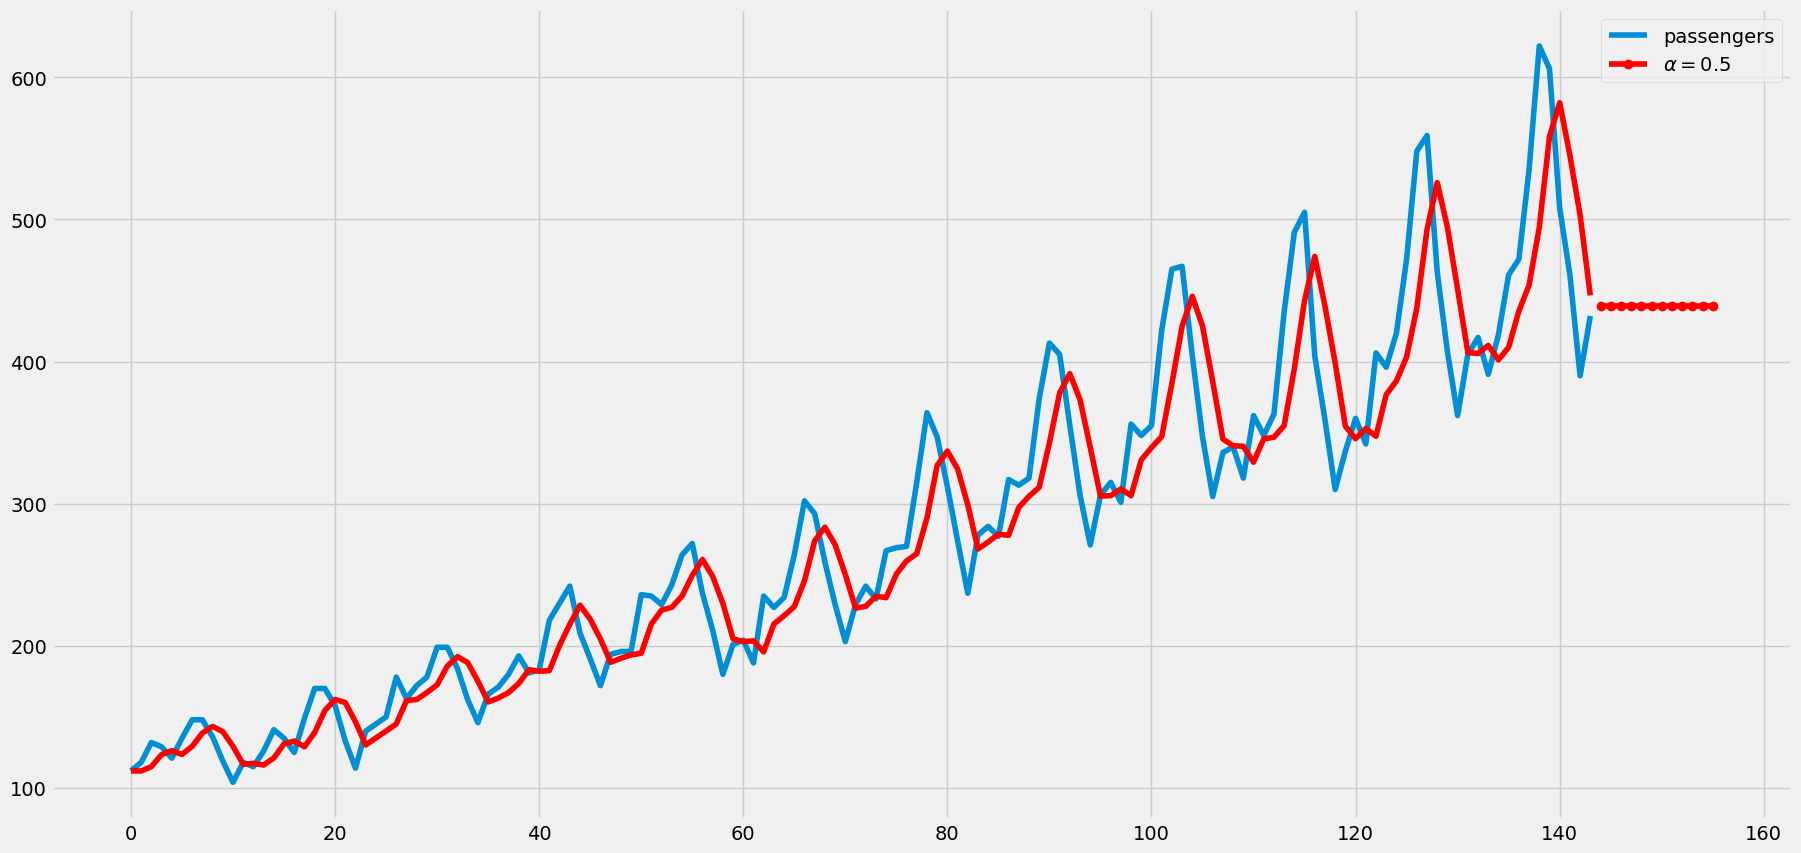

In [32]:
# applying to passenger dataset
alpha = 0.5

df = pd.read_csv(CFG.data_folder + 'passengers.csv', usecols = ['passengers'])
df.plot.line()
fit1 = SimpleExpSmoothing(df).fit(smoothing_level= alpha,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.5$')
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

We apply simple exponential smoothing to the "passengers" dataset, forecast 12 periods into the future, and visualize both the smoothed data (fitted values) and the forecast.

**1. Setting Alpha:**

*   `alpha = 0.5`:  Sets the smoothing level (`alpha`) to 0.5. This value determines how much weight is given to recent observations versus past observations in the exponential smoothing process. A value of 0.5 means that each observation receives equal weight with the previous smoothed value.

**2. Data Loading:**

*   `df = pd.read_csv(CFG.data_folder + 'passengers.csv', usecols = ['passengers'])`:
    *   `pd.read_csv(...)`: Reads a CSV file named "passengers.csv" into a Pandas DataFrame called `df`.
    *   `CFG.data_folder`:  Assumes that there's a configuration object (likely defined elsewhere in the code) named `CFG`, which has an attribute `data_folder` containing the path to the directory where the data file is located.
    *   `usecols = ['passengers']`: Specifies that only the column named "passengers" should be read from the CSV file. This creates a DataFrame with a single column representing the passenger numbers.

**3. Initial Plotting:**

*   `df.plot.line()`: Creates a line plot of the original time series data stored in the 'passengers' column of the DataFrame `df`.  This shows the raw passenger data over time.

**4. Simple Exponential Smoothing and Forecasting:**

*   `fit1 = SimpleExpSmoothing(df).fit(smoothing_level= alpha,optimized=False)`:
    *   `SimpleExpSmoothing(df)`: Creates an instance of the `SimpleExpSmoothing` class from `statsmodels`, initializing it with the time series data (`df`).
    *   `.fit(...)`: Fits the exponential smoothing model to the data.
        *   `smoothing_level= alpha`: Sets the smoothing level (alpha) for this iteration, using the pre-defined value of 0.5.
        *   `optimized=False`:  This is important! It tells `SimpleExpSmoothing` *not* to optimize the smoothing level. The code explicitly sets alpha and doesn't want statsmodels to find a "best" alpha automatically.

*   `fcast1 = fit1.forecast(12).rename(r'$\alpha=0.5$')`:
    *   `fit1.forecast(12)`:  Uses the fitted model (`fit1`) to generate forecasts for the next 12 time steps (periods).
    *   `.rename(...)`: Renames the forecast series in the DataFrame to "α=0.5". The `r'$\alpha=0.5$'` uses a raw string and LaTeX formatting to display alpha as a Greek letter (α) in the legend, making it look more mathematically correct.

**5. Plotting Forecasts and Fitted Values:**

*   `fcast1.plot(marker='o', color='red', legend=True)`: Plots the forecasted values (`fcast1`) as a red line with circular markers ('o').  `legend=True` ensures that the plot includes a legend to identify the forecast series.
*   `fit1.fittedvalues.plot(  color='red')`: Plots the fitted values (the smoothed time series) generated by the model. These represent the estimated values of the time series based on the exponential smoothing process. They are also plotted as a red line.

**6. Displaying the Plot:**

*   `plt.show()`: Displays the plot that has been created, showing the original time series, the fitted values (smoothed data), and the forecasts for alpha = 0.5.

## Double Exponential Smoothing


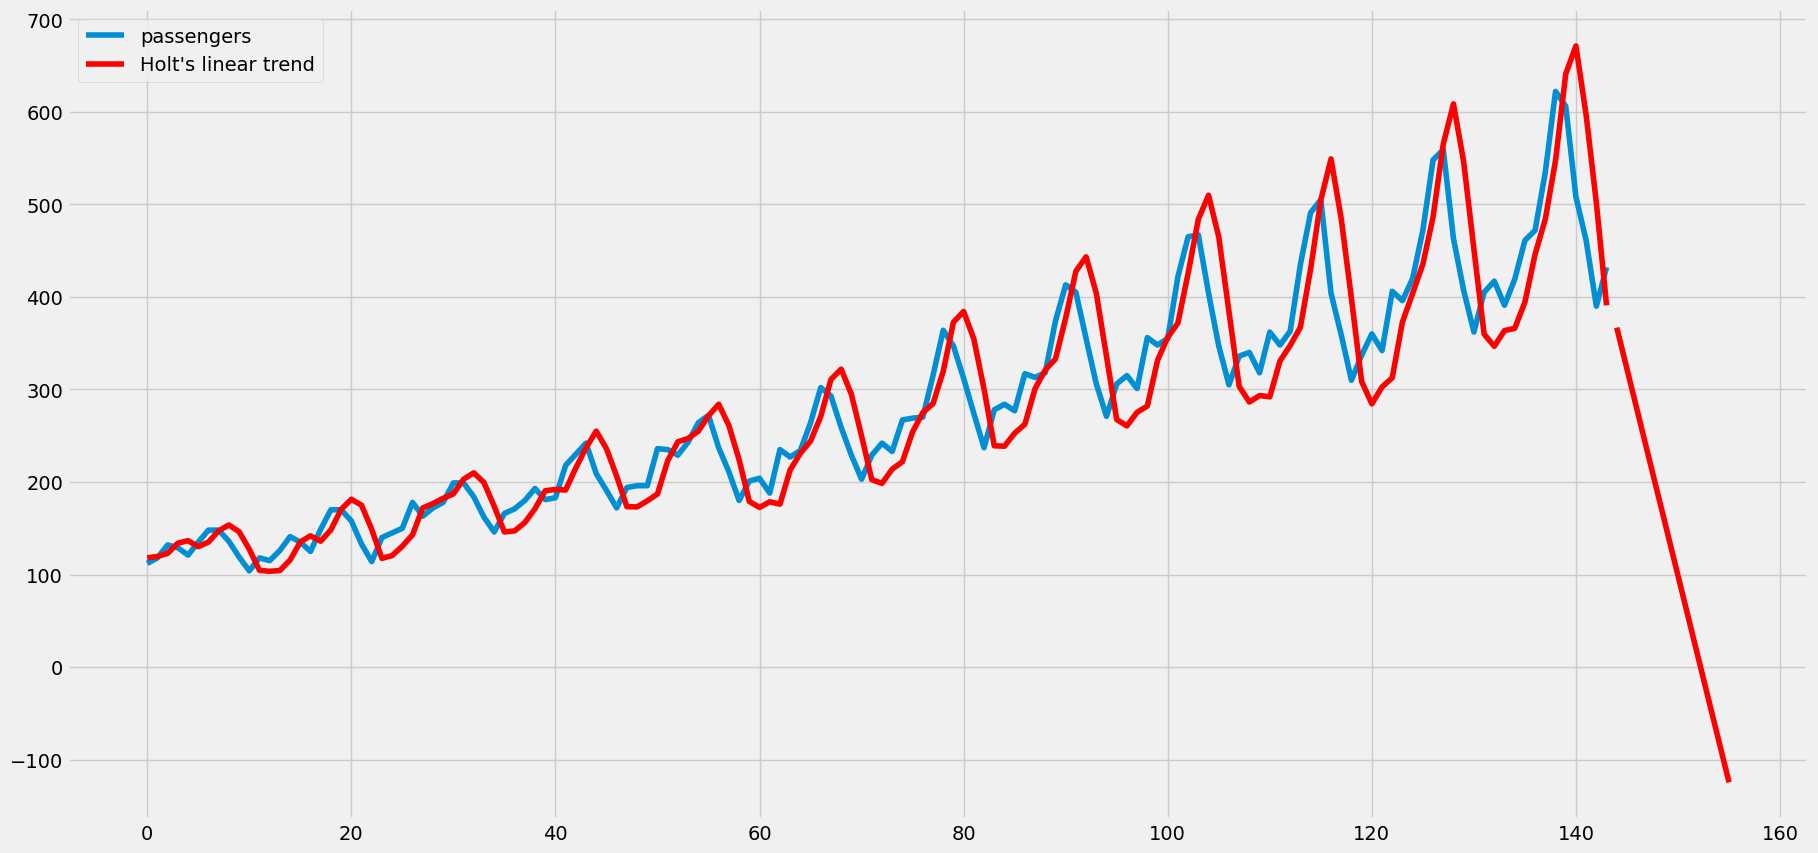

In [33]:

alpha = 0.5
df.plot.line()

fit1 = Holt(df).fit(smoothing_level=0.5, smoothing_slope=0.5, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")
fit1.fittedvalues.plot(color='red')
fcast1.plot(color='red', legend=True)

plt.show()

This code applies Holt's linear trend method to the "passengers" dataset, forecasts 12 periods into the future, and visualizes both the smoothed data (fitted values) and the forecast. 
**1. Data Loading & Initial Plotting:**

*   `alpha = 0.5`: Sets a variable `alpha`, though it isn't directly used in this specific code block. It seems to be leftover from previous examples.
*   `df.plot.line()`: Creates a line plot of the original time series data stored in the DataFrame `df`. This shows the raw passenger data over time.  It assumes that `df` has already been loaded as in the previous example (from 'passengers.csv' with only the 'passengers' column).

**2. Holt's Linear Trend Method and Forecasting:**

*   `fit1 = Holt(df).fit(smoothing_level=0.5, smoothing_slope=0.5, optimized=False)`:
    *   `Holt(df)`: Creates an instance of the `Holt` class from `statsmodels`, initializing it with the time series data (`df`). The `Holt` method is designed for time series data that exhibits a trend but no seasonality.
    *   `.fit(...)`: Fits the Holt's linear trend model to the data.
        *   `smoothing_level=0.5`: Sets the smoothing level (alpha) for the level component of the model to 0.5. This controls how much weight is given to recent observations when estimating the current level of the series.
        *   `smoothing_slope=0.5`: Sets the smoothing factor (beta) for the trend component of the model to 0.5.  This controls how much weight is given to recent changes in the slope (trend) of the series.
        *   `optimized=False`: This crucial parameter tells `Holt` *not* to optimize the smoothing levels (alpha and beta). The code explicitly sets these values and doesn't want statsmodels to find "best" values automatically.

*   `fcast1 = fit1.forecast(12).rename("Holt's linear trend")`:
    *   `fit1.forecast(12)`: Uses the fitted model (`fit1`) to generate forecasts for the next 12 time steps (periods).
    *   `.rename(...)`: Renames the forecast series in the DataFrame to "Holt's linear trend", making it easier to identify the forecast on the plot.

**3. Plotting Forecasts and Fitted Values:**

*   `fit1.fittedvalues.plot(color='red')`: Plots the fitted values (the smoothed time series) generated by the Holt model as a red line. These represent the estimated values of the time series based on the trend component.
*   `fcast1.plot(color='red', legend=True)`: Plots the forecasted values (`fcast1`) as a red line. `legend=True` ensures that the plot includes a legend to identify the forecast series.

**4. Displaying the Plot:**

*   `plt.show()`: Displays the plot, showing the original time series, the fitted values (smoothed data), and the forecasts generated by Holt's linear trend method.


## Triple exponential smoothing

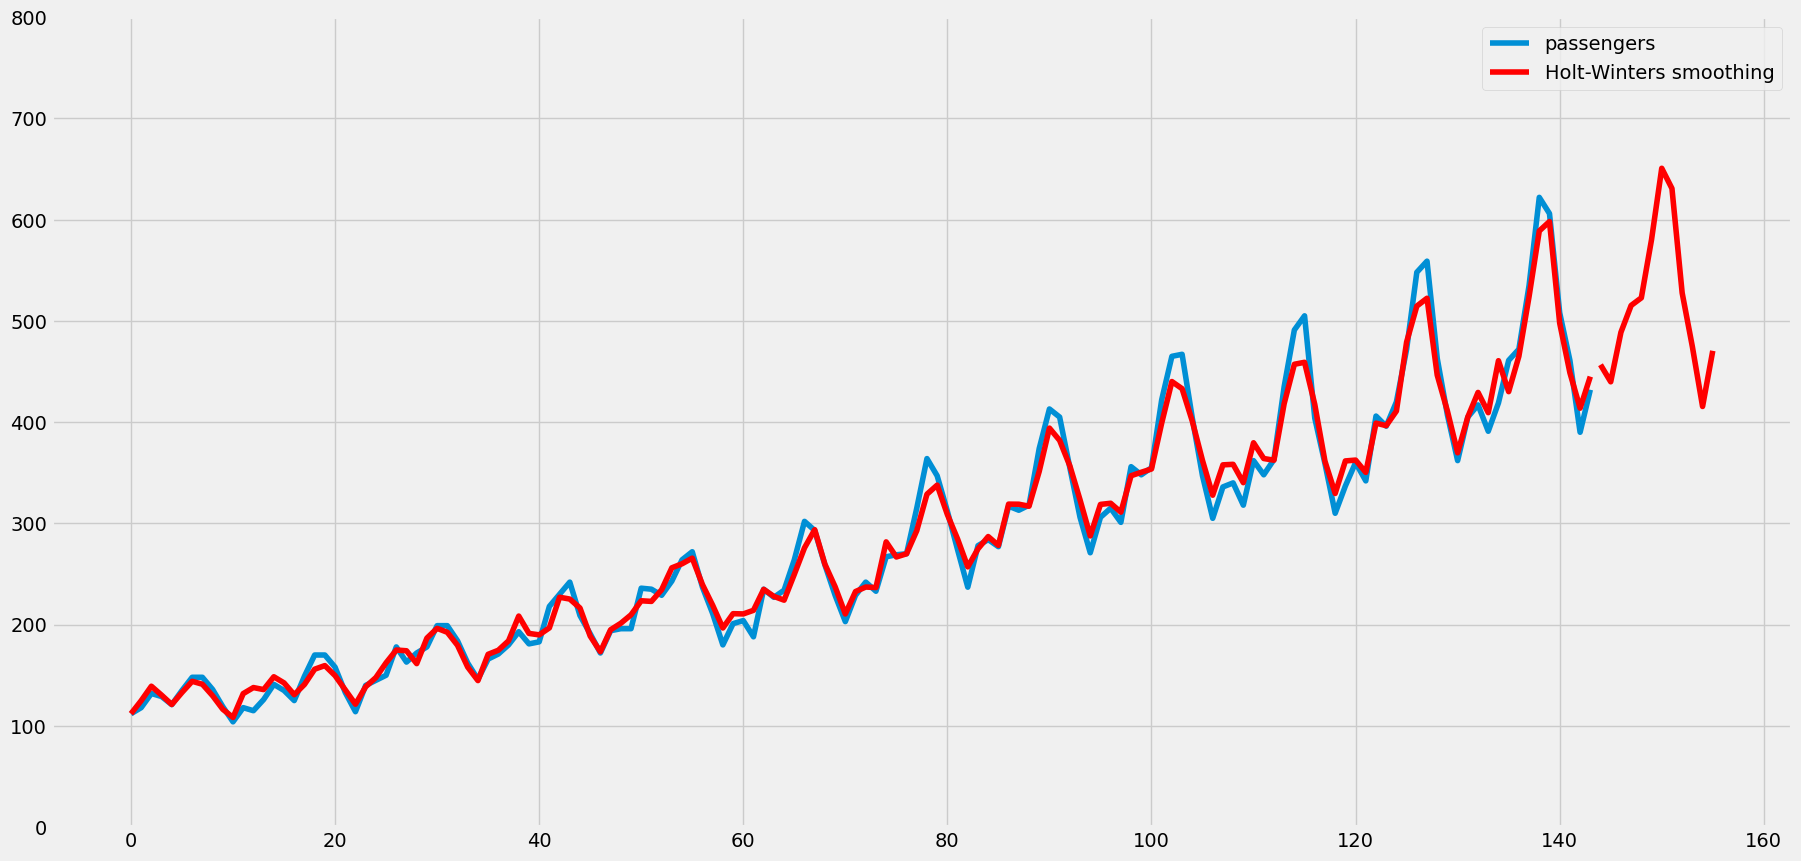

In [34]:
alpha = 0.5
df.plot.line()
fit1 = ExponentialSmoothing(df, seasonal_periods=12, trend='add', seasonal='add')
fit1 = fit1.fit(smoothing_level=0.5)
fit1.fittedvalues.plot(color='red')
fit1.forecast(12).rename("Holt-Winters smoothing").plot(color='red', legend=True)

plt.ylim(0, 800); plt.show()


This code snippet applies Holt-Winters' exponential smoothing to the "passengers" dataset, which is suitable for time series data with both trend and seasonality. It forecasts 12 periods into the future and visualizes the smoothed data (fitted values) and the forecast. 

**1. Data Loading & Initial Plotting:**

*   `alpha = 0.5`: Sets a variable `alpha`, which is used as the smoothing level in this case, but note that Holt-Winters automatically optimizes all smoothing parameters if not explicitly set.
*   `df.plot.line()`: Creates a line plot of the original time series data, showing the raw passenger numbers over time.

**2. Holt-Winters Exponential Smoothing & Fitting:**

*   `fit1 = ExponentialSmoothing(df, seasonal_periods=12, trend='add', seasonal='add')`:
    *   `ExponentialSmoothing(df, ...)`: Creates an instance of the `ExponentialSmoothing` class from `statsmodels`, initializing it with the time series data (`df`). This is the core Holt-Winters implementation.
        *   `seasonal_periods=12`: Specifies that the seasonality has a period of 12 (e.g., monthly data with yearly seasonality).  This tells the model to look for repeating patterns every 12 periods.
        *   `trend='add'`: Indicates that the trend component is additive. This means the trend is added to the seasonal and level components. Use `'mul'` for a multiplicative trend (where the trend multiplies the other components).
        *   `seasonal='add'`:  Indicates that the seasonal component is additive. This means the seasonality is added to the level and trend components. Use `'mul'` for a multiplicative seasonal component.

*   `fit1 = fit1.fit(smoothing_level=0.5)`: Fits the Holt-Winters model to the data.
    * `smoothing_level=0.5`: Sets the initial smoothing level (alpha) to 0.5.  However, because no other smoothing parameters are explicitly set, statsmodels will *optimize* all three smoothing parameters (alpha, beta for trend, and gamma for seasonality) to find the best fit to the data.

**3. Plotting Fitted Values:**

*   `fit1.fittedvalues.plot(color='red')`: Plots the fitted values (the smoothed time series) generated by the Holt-Winters model as a red line. These represent the estimated values of the time series based on the trend and seasonal components.

**4. Plotting Forecasts:**

*   `fit1.forecast(12).rename("Holt-Winters smoothing").plot(color='red', legend=True)`:
    *   `fit1.forecast(12)`: Uses the fitted model (`fit1`) to generate forecasts for the next 12 time steps (periods).
    *   `.rename(...)`: Renames the forecast series in the DataFrame to "Holt-Winters smoothing", making it easier to identify on the plot.
    *   `.plot(color='red', legend=True)`: Plots the forecasted values as a red line and adds them to the legend.

**5. Setting Y-axis Limits & Displaying Plot:**

*   `plt.ylim(0, 800)`: Sets the limits of the y-axis (vertical axis) of the plot from 0 to 800. This ensures that the entire time series and forecast are visible within the plot's bounds.
*   `plt.show()`: Displays the plot, showing the original time series, the fitted values, and the forecasts generated by Holt-Winters smoothing.

# Application: anomaly detection 

<Axes: >

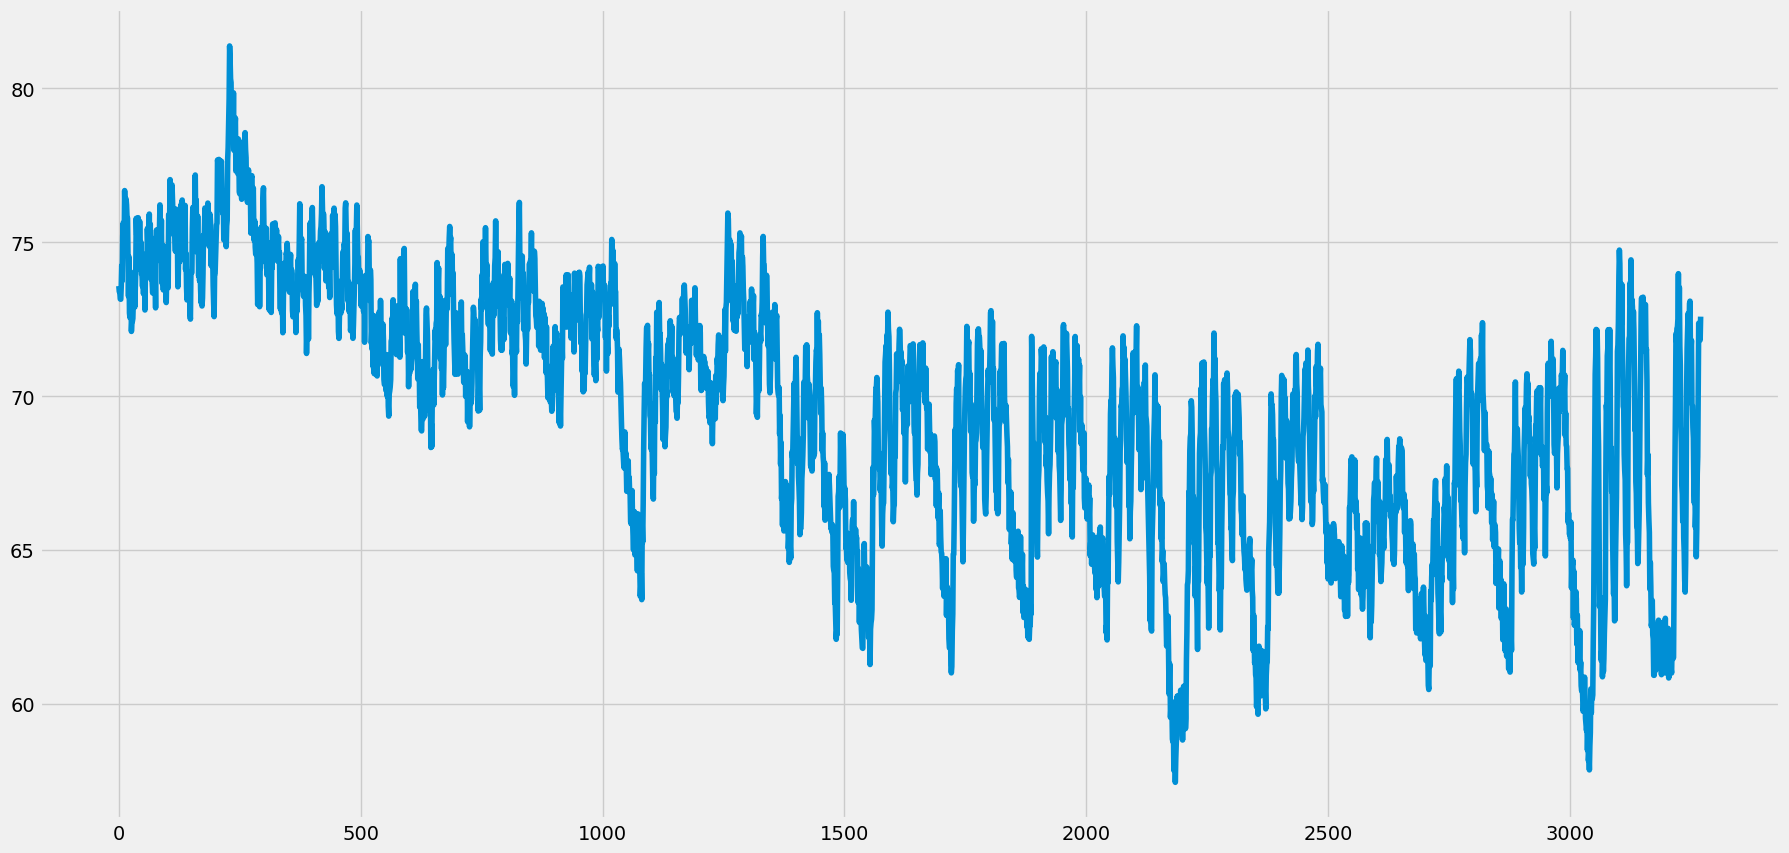

In [35]:
# load 
series = pd.read_csv(CFG.data_folder + 'ambient_temperature_system_failure.csv')
series['timestamp'] = pd.to_datetime(series['timestamp'])

# plot 
series['value'].plot()

Loads a time series dataset from a CSV file and then plots the 'value' column as a line graph over time.  

**1. Loading the Data:**

*   `series = pd.read_csv(CFG.data_folder + 'ambient_temperature_system_failure.csv')`:
    *   `pd.read_csv(...)`: Reads a CSV file named "ambient_temperature_system_failure.csv" into a Pandas DataFrame called `series`.
    *   `CFG.data_folder`: Assumes that there's a configuration object (likely defined elsewhere in the code) named `CFG`, which has an attribute `data_folder` containing the path to the directory where the data file is located. This makes the code more flexible and easier to manage if the data location changes.

*   `series['timestamp'] = pd.to_datetime(series['timestamp'])`:
    *   `series['timestamp']`: Selects the column named 'timestamp' from the DataFrame `series`.  It assumes that this column contains date/time information as strings or in a format Pandas can recognize.
    *   `pd.to_datetime(...)`: Converts the values in the 'timestamp' column to datetime objects using Pandas' `to_datetime()` function. This is crucial for time series analysis, as it allows you to perform operations like indexing by date/time and calculating time differences.  The resulting datetime objects are then assigned back to the 'timestamp' column of the DataFrame.

**2. Plotting the Time Series:**

*   `series['value'].plot()`:
    *   `series['value']`: Selects the column named 'value' from the DataFrame `series`. This is assumed to be the time series data you want to visualize (e.g., ambient temperature).
    *   `.plot()`: Creates a line plot of the values in the 'value' column, with the index (which should now be the datetime objects in the 'timestamp' column) on the x-axis and the 'value' on the y-axis.  Pandas uses Matplotlib under the hood to create this plot.

<Axes: >

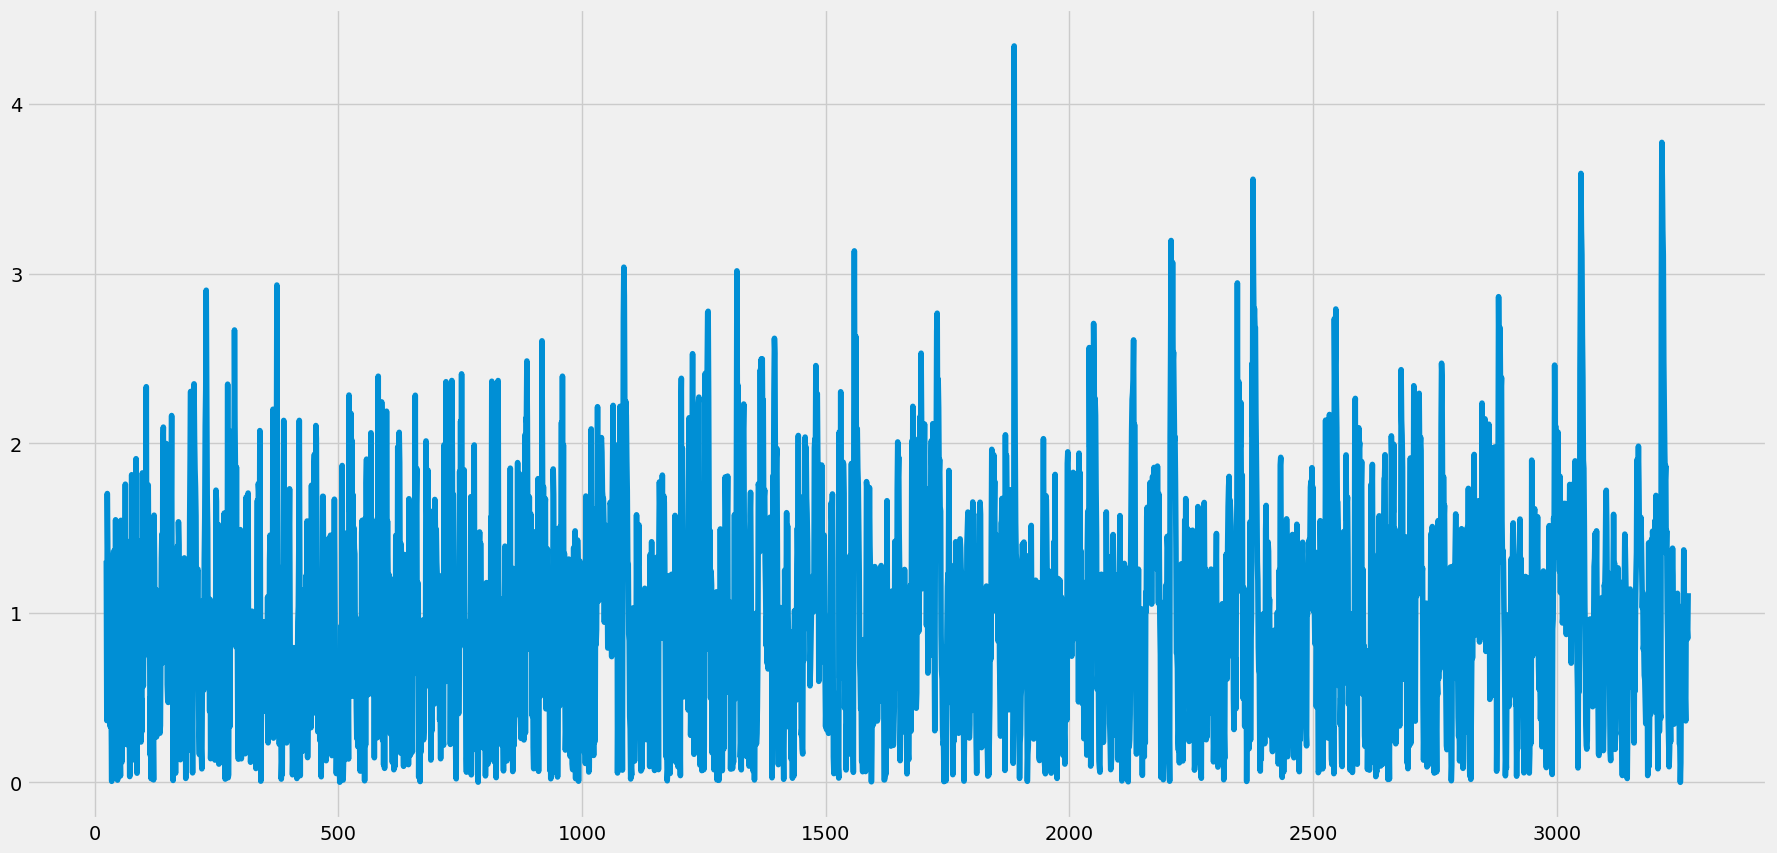

In [36]:
# pick a window size 
window_size = 25

# calculate rolling mean and standard deviation
xroll = series['value'].rolling(window_size)
series['mean_roll'] = xroll.mean()
series['sd_roll'] = xroll.std()

# calculate the Z-score
series['zscore'] = np.abs( (series['value'] - series['mean_roll']) / series['sd_roll'])
series['zscore'].plot()

We calculate the rolling mean, standard deviation, and Z-score of a time series and then plot the Z-score over time. This is a common technique for anomaly detection in time series data. 

**1. Setting Window Size:**

*   `window_size = 25`: Defines the size of the rolling window to be used for calculating the moving average and standard deviation. A larger window size will smooth out more noise but may also obscure shorter-term trends.

**2. Calculating Rolling Mean and Standard Deviation:**

*   `xroll = series['value'].rolling(window_size)`:
    *   `series['value']`: Selects the 'value' column from the DataFrame `series`.
    *   `.rolling(window_size)`: Creates a rolling window object that iterates through the 'value' column, taking chunks of size `window_size` at a time.

*   `series['mean_roll'] = xroll.mean()`:
    *   `xroll.mean()`: Calculates the mean (average) value within each rolling window.
    *   `series['mean_roll'] = ...`: Assigns the calculated rolling means to a new column named 'mean_roll' in the DataFrame `series`.

*   `series['sd_roll'] = xroll.std()`:
    *   `xroll.std()`: Calculates the standard deviation within each rolling window. The standard deviation measures the spread or dispersion of values around the mean.
    *   `series['sd_roll'] = ...`: Assigns the calculated rolling standard deviations to a new column named 'sd_roll' in the DataFrame `series`.

**3. Calculating Z-Score:**

*   `series['zscore'] = np.abs( (series['value'] - series['mean_roll']) / series['sd_roll'])`:
    *   `(series['value'] - series['mean_roll'])`: Calculates the difference between each original value and its corresponding rolling mean. This represents how much each data point deviates from the average of its surrounding values.
    *   `/ series['sd_roll']`: Divides the deviation by the rolling standard deviation. This normalizes the deviation, expressing it in terms of standard deviations away from the mean.
    *   `np.abs(...)`: Takes the absolute value of the result.  This ensures that both positive and negative deviations are treated equally when identifying anomalies. A large absolute Z-score indicates a significant deviation from the expected range based on the rolling statistics.
    *   `series['zscore'] = ...`: Assigns the calculated Z-scores to a new column named 'zscore' in the DataFrame `series`.

**4. Plotting the Z-Score:**

*   `series['zscore'].plot()`: Creates a line plot of the Z-score values over time.  This allows you to visually identify points where the Z-score is unusually high, which may indicate anomalies or outliers in the original time series data.


In [37]:
# check which observations are out of range
series.loc[series['zscore'] > 3][['timestamp', 'value']]

,timestamp,value
1086,2014-02-17 13:00:00,69.519207
1318,2014-02-27 05:00:00,69.425502
1559,2014-03-10 11:00:00,67.688348
1887,2014-03-24 19:00:00,71.943363
2209,2014-04-14 10:00:00,63.873030
2212,2014-04-14 13:00:00,66.890486
2377,2014-04-21 10:00:00,64.916813
2378,2014-04-21 11:00:00,65.396986
3050,2014-05-19 11:00:00,66.461085
3051,2014-05-19 12:00:00,68.261759


Filters the DataFrame `series` to identify and display observations where the Z-score exceeds a threshold of 3, indicating potential anomalies. 

*   `series.loc[series['zscore'] > 3]`: This is the core filtering operation.
    *   `series['zscore'] > 3`: Creates a boolean mask (a Series of True/False values) where `True` indicates that the Z-score for that row is greater than 3, and `False` otherwise.  A Z-score above 3 is often used as a threshold to identify outliers or anomalies, assuming a roughly normal distribution of data.
    *   `series.loc[...]`: Uses the `.loc[]` indexer to select rows from the DataFrame `series` based on the boolean mask. Only rows where the corresponding value in the mask is `True` will be included in the result.

*   `[['timestamp', 'value']]`: This part specifies which columns to include in the output. It selects only the 'timestamp' and 'value' columns from the filtered DataFrame.  This makes the output more concise and focuses on the relevant information (when the anomaly occurred and its value).


# Building a model

<Axes: >

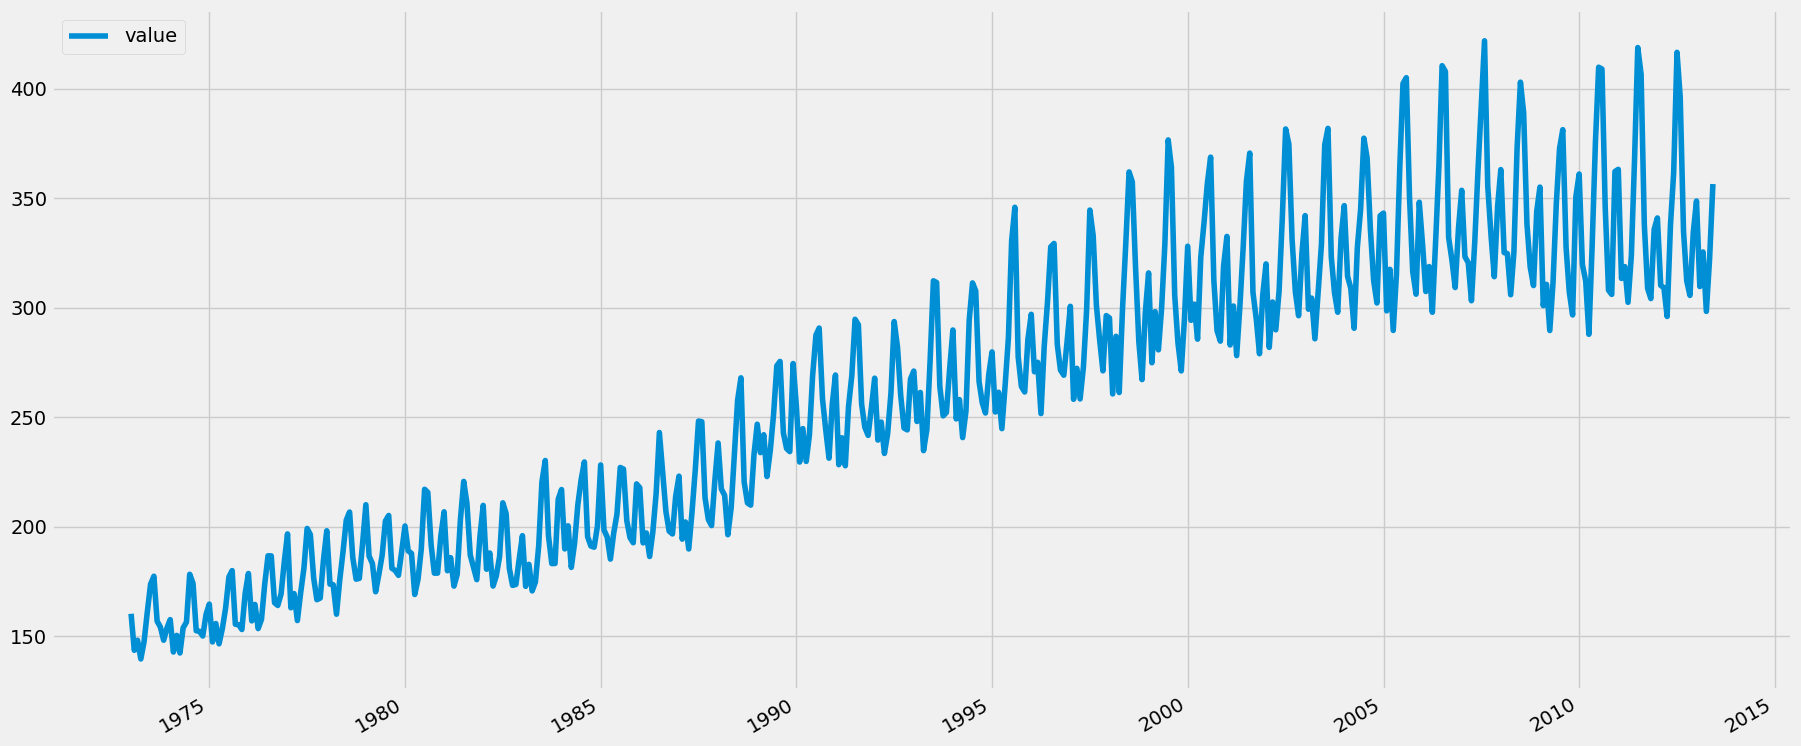

In [38]:
df = pd.read_csv(CFG.data_folder + 'us_energy.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
df.plot(xlabel="")

This load the CSV file containing US energy data, converts the 'date' column to datetime objects, sets the 'date' column as the DataFrame index, and then plots the time series data. 

**1. Loading the Data:**

*   `df = pd.read_csv(CFG.data_folder + 'us_energy.csv')`:
    *   `pd.read_csv(...)`: Reads a CSV file named "us_energy.csv" into a Pandas DataFrame called `df`.
    *   `CFG.data_folder`: Assumes that there's a configuration object (likely defined elsewhere in the code) named `CFG`, which has an attribute `data_folder` containing the path to the directory where the data file is located.

**2. Converting Date Column:**

*   `df['date'] = pd.to_datetime(df['date'])`:
    *   `df['date']`: Selects the column named 'date' from the DataFrame `df`. It assumes this column contains date information as strings or in a format Pandas can recognize.
    *   `pd.to_datetime(...)`: Converts the values in the 'date' column to datetime objects using Pandas' `to_datetime()` function. This is essential for time series analysis, allowing you to perform operations like indexing by date/time and calculating time differences. The resulting datetime objects are assigned back to the 'date' column of the DataFrame.

**3. Setting Date as Index:**

*   `df.set_index('date', inplace = True)`:
    *   `df.set_index('date')`: Sets the 'date' column as the index of the DataFrame `df`. This is a common practice in time series analysis, as it allows you to easily access data by date and perform time-based operations.
    *   `inplace = True`: Modifies the DataFrame `df` directly without creating a new copy.

**4. Plotting the Time Series:**

*   `df.plot(xlabel="")`: Creates a line plot of the time series data.  Since 'date' is now the index, Pandas automatically uses it as the x-axis.
    *   `xlabel=""`: Sets the label for the x-axis to an empty string, effectively removing the x-axis label from the plot. This might be done if the date information on the x-axis is already clear or if a custom label will be added later.


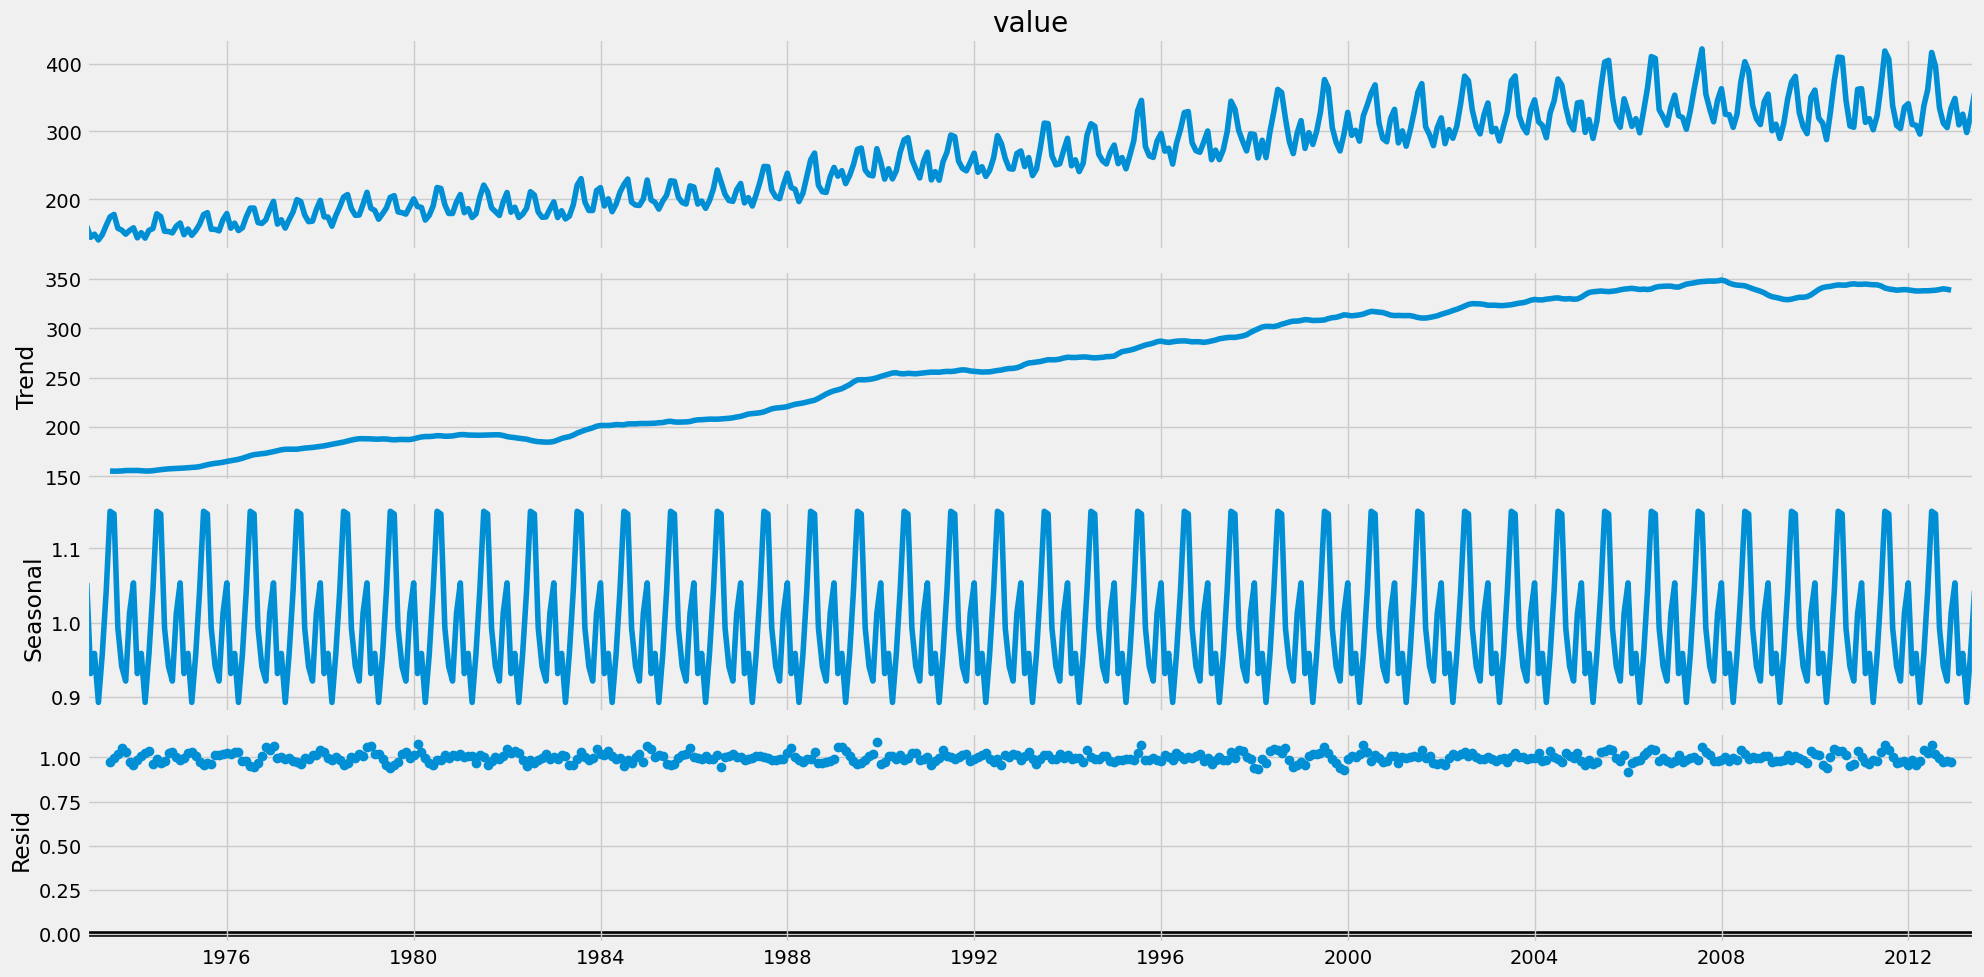

In [39]:
decomposition = seasonal_decompose(df["value"],period =12, model = 'multiplicative')
figure = decomposition.plot()
plt.show()

This part performs a seasonal decomposition of the "value" column from your DataFrame `df` and then plots the decomposed components (trend, seasonality, and residual).

**1. Seasonal Decomposition:**

*   `decomposition = seasonal_decompose(df["value"], period=12, model='multiplicative')`:
    *   `seasonal_decompose(...)`: This function from `statsmodels.tsa.seasonal` decomposes a time series into its constituent components: trend, seasonality, and residual (random noise).
        *   `df["value"]`: Specifies the time series data to be decomposed – in this case, the 'value' column of your DataFrame `df`.
        *   `period=12`:  Specifies the length of the seasonal cycle. A period of 12 is appropriate for monthly data with yearly seasonality (e.g., sales that peak every December).
        *   `model='multiplicative'`: Specifies the type of decomposition model to use.
            *   **Multiplicative:** Assumes that the seasonal component varies proportionally to the level of the time series.  This is appropriate when the magnitude of the seasonal fluctuations increases or decreases with the overall trend. The formula would be: `observed = trend * seasonality * residual`.
            *   **Additive:** (The default if not specified) Assumes that the seasonal component has a constant magnitude regardless of the level of the time series.  The formula would be: `observed = trend + seasonality + residual`.

**2. Plotting the Decomposition:**

*   `figure = decomposition.plot()`:
    *   `decomposition.plot()`: Creates a plot showing the original time series along with its decomposed components (trend, seasonality, and residual). The function returns a Matplotlib figure object.
    *   `figure = ...`: Assigns the returned figure object to the variable `figure`.  This allows you to further customize the plot if needed.

**3. Displaying the Plot:**

*   `plt.show()`: Displays the generated plot, showing the original time series and its decomposed components. The plot will typically have four subplots:
    *   The original time series.
    *   The estimated trend component.
    *   The estimated seasonal component.
    *   The residual (random noise) component.


In [40]:
# training / validation split
cutoff_date = '2005-12-31'
xtrain, xvalid  = df.loc[df.index <= cutoff_date], df.loc[df.index > cutoff_date]
print(xtrain.shape, xvalid.shape)

(397, 1) (89, 1)


The code splits the time series data into training and validation sets based on a specified cutoff date. This is a crucial step in preparing the data for model building and evaluation.  

**1. Defining the Cutoff Date:**

*   `cutoff_date = '2005-12-31'`: Sets the cutoff date to December 31, 2005. This date will be used to divide the time series into training and validation sets.  Data on or before this date will be used for training, while data after this date will be used for validation (testing).

**2. Splitting the Data:**

*   `xtrain, xvalid = df.loc[df.index <= cutoff_date], df.loc[df.index > cutoff_date]`: This line performs the split using boolean indexing with Pandas' `.loc[]` indexer.
    *   `df.index <= cutoff_date`: Creates a boolean mask (a Series of True/False values) where `True` indicates that the date in the DataFrame's index is less than or equal to the `cutoff_date`, and `False` otherwise.
    *   `df.loc[df.index <= cutoff_date]`: Selects all rows from the DataFrame `df` where the corresponding value in the boolean mask is `True`. This creates a new DataFrame containing the training data (`xtrain`).
    *   `df.index > cutoff_date`: Creates another boolean mask where `True` indicates that the date in the DataFrame's index is greater than the `cutoff_date`, and `False` otherwise.
    *   `df.loc[df.index > cutoff_date]`: Selects all rows from the DataFrame `df` where the corresponding value in this second boolean mask is `True`. This creates a new DataFrame containing the validation data (`xvalid`).

**3. Printing Shapes:**

*   `print(xtrain.shape, xvalid.shape)`: Prints the shapes (number of rows and columns) of the `xtrain` and `xvalid` DataFrames.  This is useful for verifying that the split was performed correctly and to understand the size of each dataset. The output will be in the format `(rows_train, columns_train) (rows_valid, columns_valid)`.


In [41]:
fit1 = ExponentialSmoothing(xtrain['value'].values, seasonal_periods=12, trend='mul', seasonal='mul')
fit1 = fit1.fit()

This fits an exponential smoothing model (specifically Holt-Winters) to the training data using a multiplicative model with both trend and seasonality. Let's break it down:

**1. Initializing the Model:**

*   `fit1 = ExponentialSmoothing(xtrain['value'].values, seasonal_periods=12, trend='mul', seasonal='mul')`:
    *   `ExponentialSmoothing(...)`: Creates an instance of the `ExponentialSmoothing` class from `statsmodels`, which implements Holt-Winters' exponential smoothing.
        *   `xtrain['value'].values`: Provides the training data to the model.  `.values` extracts the NumPy array of values from the 'value' column of the `xtrain` DataFrame. This is important because statsmodels often expects a NumPy array as input.
        *   `seasonal_periods=12`: Specifies that the seasonality has a period of 12 (e.g., monthly data with yearly seasonality).  This tells the model to look for repeating patterns every 12 periods.
        *   `trend='mul'`: Indicates that the trend component is multiplicative. This means the trend multiplies the level and seasonal components.
        *   `seasonal='mul'`: Indicates that the seasonal component is multiplicative. This means the seasonality multiplies the level and trend components.

**2. Fitting the Model:**

*   `fit1 = fit1.fit()`:
    *   `.fit()`: Fits (trains) the exponential smoothing model to the training data.  This process estimates the optimal values for the smoothing parameters (alpha, beta, gamma) that minimize the error between the predicted values and the actual values in the training set. Because no specific smoothing levels were provided, statsmodels will optimize these automatically.


In [42]:
fit1.params_formatted

,name,param,optimized
smoothing_level,alpha,0.281657,True
smoothing_trend,beta,0.000000,True
smoothing_seasonal,gamma,0.226347,True
initial_level,l.0,155.198901,True
initial_trend,b.0,1.001948,True
initial_seasons.0,s.0,1.044362,True
initial_seasons.1,s.1,0.919946,True
initial_seasons.2,s.2,0.944655,True
initial_seasons.3,s.3,0.877853,True
initial_seasons.4,s.4,0.927012,True


Retrieve the  optimized parameter values (smoothing levels) from the fitted Holt-Winters exponential smoothing model (`fit1`):

*   `fit1.params_formatted`: This accesses the `params_formatted` attribute of the fitted `ExponentialSmoothing` object (`fit1`).
    *   `params_formatted`:  This is a Pandas Series that contains the optimized values for the smoothing parameters (alpha, beta, and gamma) used in the Holt-Winters model. It also includes their names and standard errors. The formatting makes it easy to read and understand the results of the optimization process.

*   `level`: Represents alpha (α), the smoothing level for the level component of the time series.  It controls how much weight is given to recent observations when estimating the current level.
*   `trend`: Represents beta (β), the smoothing factor for the trend component. It controls how much weight is given to recent changes in the slope (trend) of the series.
*   `seasonal`: Represents gamma (γ), the smoothing factor for the seasonal component.  It controls how much weight is given to recent seasonal fluctuations.


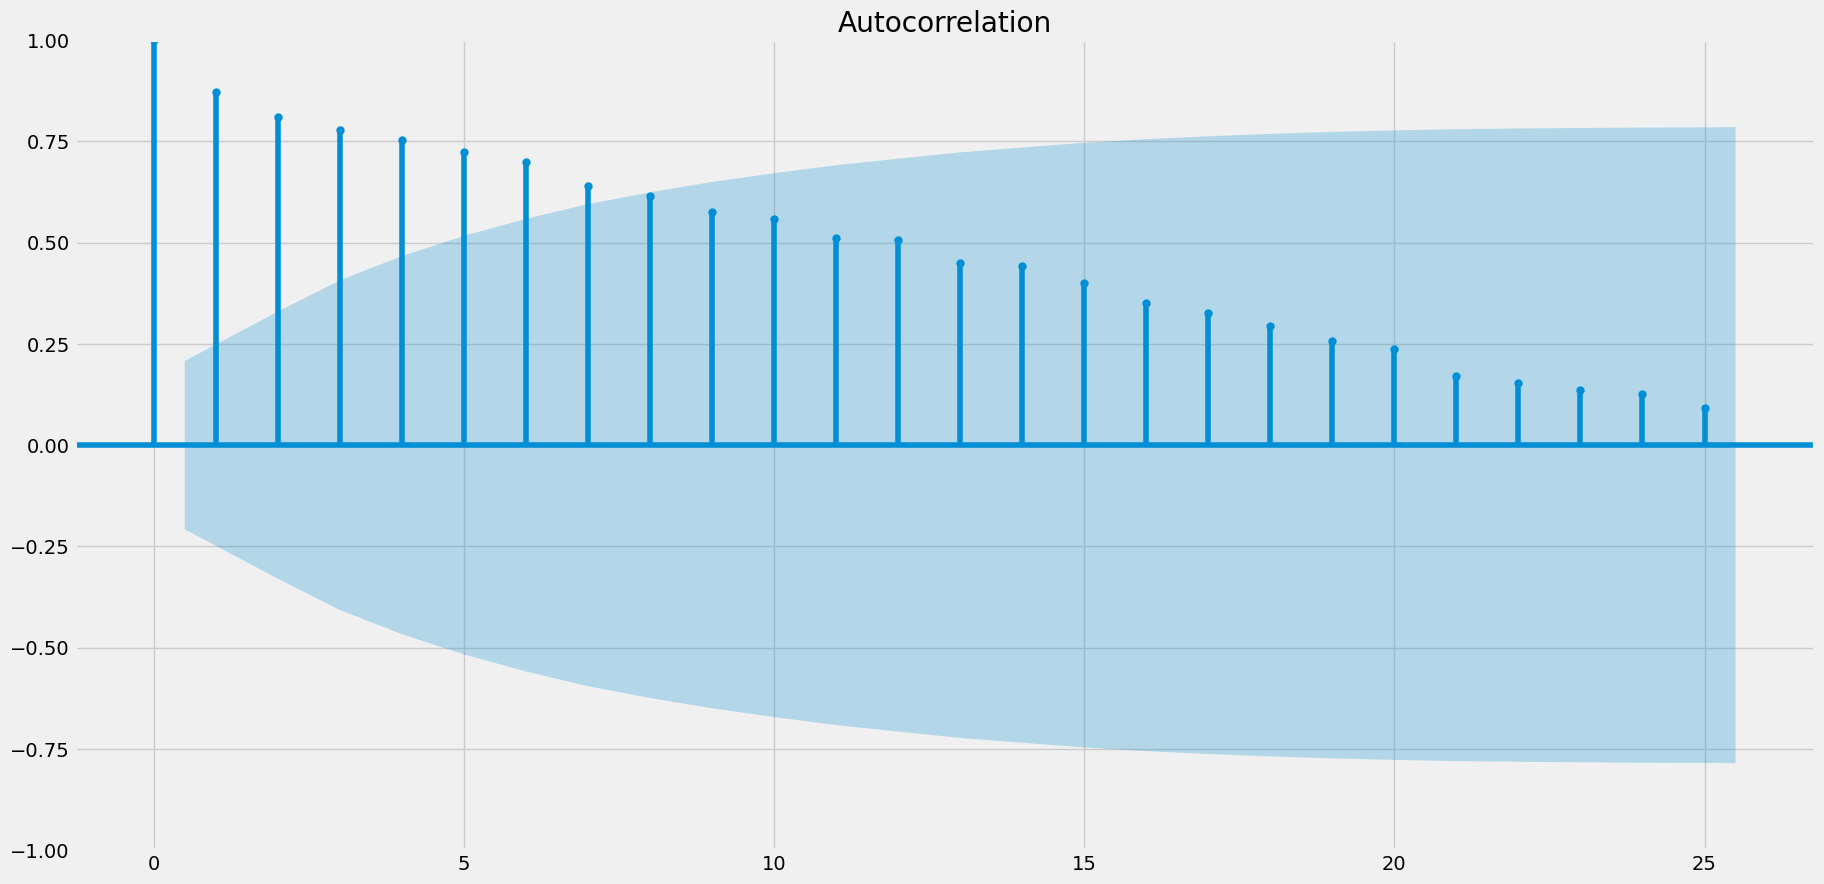

In [43]:
# What do the residuals look like?
prediction = fit1.forecast(len(xvalid)).copy()

xresiduals = xvalid['value'] - prediction
plot_acf(xresiduals, lags = 25)
print()

This part analyzes the residuals (the differences between actual and predicted values) from your Holt-Winters model to assess its performance.  

**1. Forecasting on Validation Data:**

*   `prediction = fit1.forecast(len(xvalid)).copy()`:
    *   `fit1.forecast(len(xvalid))`: Uses the fitted Holt-Winters model (`fit1`) to generate forecasts for a number of periods equal to the length of your validation set (`xvalid`). This creates a Pandas Series containing the predicted values.
    *   `.copy()`: Creates a copy of the forecast series.  This is important to avoid potential issues with modifying the original forecast data unintentionally.

**2. Calculating Residuals:**

*   `xresiduals = xvalid['value'] - prediction`:
    *   `xvalid['value']`: Selects the actual values from the 'value' column of your validation set (`xvalid`).
    *   `- prediction`: Subtracts the predicted values (from `prediction`) from the actual values. The result is a Pandas Series containing the residuals – the differences between what actually happened and what the model predicted.

**3. Analyzing Residuals with ACF Plot:**

*   `plot_acf(xresiduals, lags = 25)`:
    *   `plot_acf(...)`:  This function from `statsmodels.graphics.tsaplots` creates an Autocorrelation Function (ACF) plot of the residuals. The ACF plot shows the correlation between the residuals and their lagged values.
        *   `xresiduals`: Provides the series of residuals to be analyzed.
        *   `lags = 25`: Specifies the maximum number of lags to include in the ACF plot.  A lag represents a time step back from the current observation.

**4. Printing an Empty Line:**

*   `print()`: Prints an empty line to add some visual separation between the ACF plot and any subsequent output. This is purely for formatting purposes.


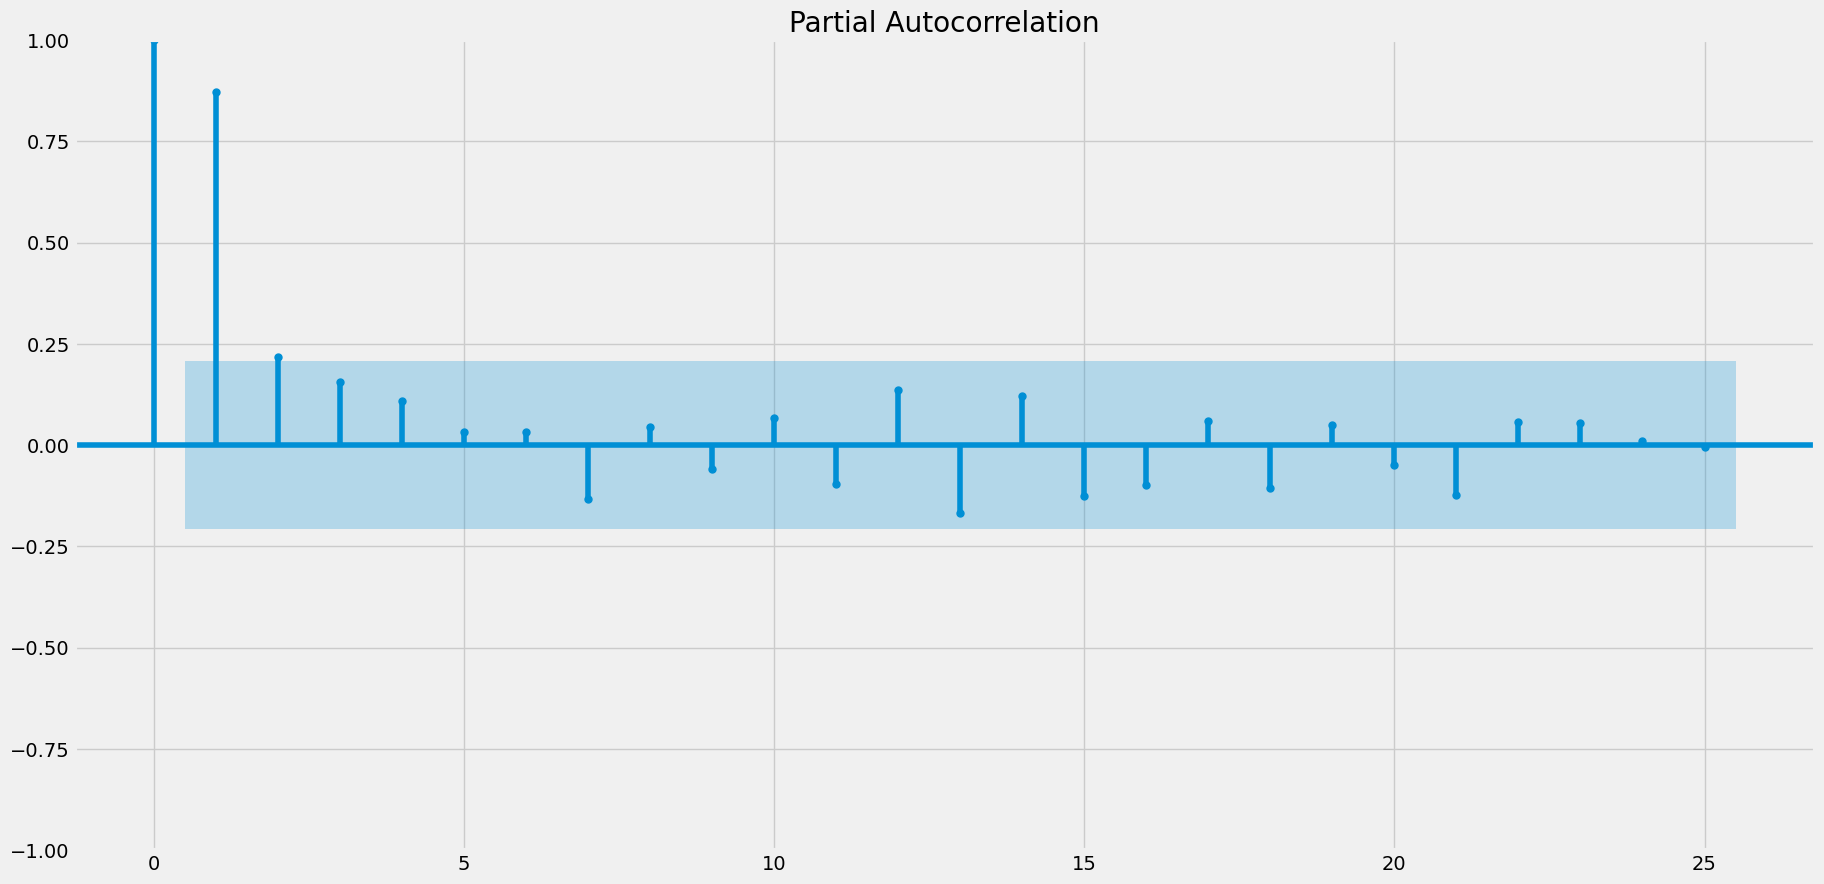

In [44]:
plot_pacf(xresiduals, lags = 25)
print()

This code analyzes the residuals from your Holt-Winters model using a Partial Autocorrelation Function (PACF) plot to further assess its performance and identify potential areas for improvement.  

*   `plot_pacf(xresiduals, lags = 25)`:
    *   `plot_pacf(...)`: This function from `statsmodels.graphics.tsaplots` creates a Partial Autocorrelation Function (PACF) plot of the residuals. The PACF plot shows the correlation between the residuals and their lagged values *after removing the effects of intermediate lags*.  This helps to identify the direct relationship between an observation and its past values, without being influenced by other intervening observations.
        *   `xresiduals`: Provides the series of residuals (calculated in the previous step) to be analyzed.
        *   `lags = 25`: Specifies the maximum number of lags to include in the PACF plot.

*   `print()`: Prints an empty line for visual separation, similar to the previous code snippet.


/var/folders/p7/1x2749b14hj0xrrrwm84gh8m0000gn/T/ipykernel_22644/1441854185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xvalid['prediction'] = prediction


<Axes: xlabel='date'>

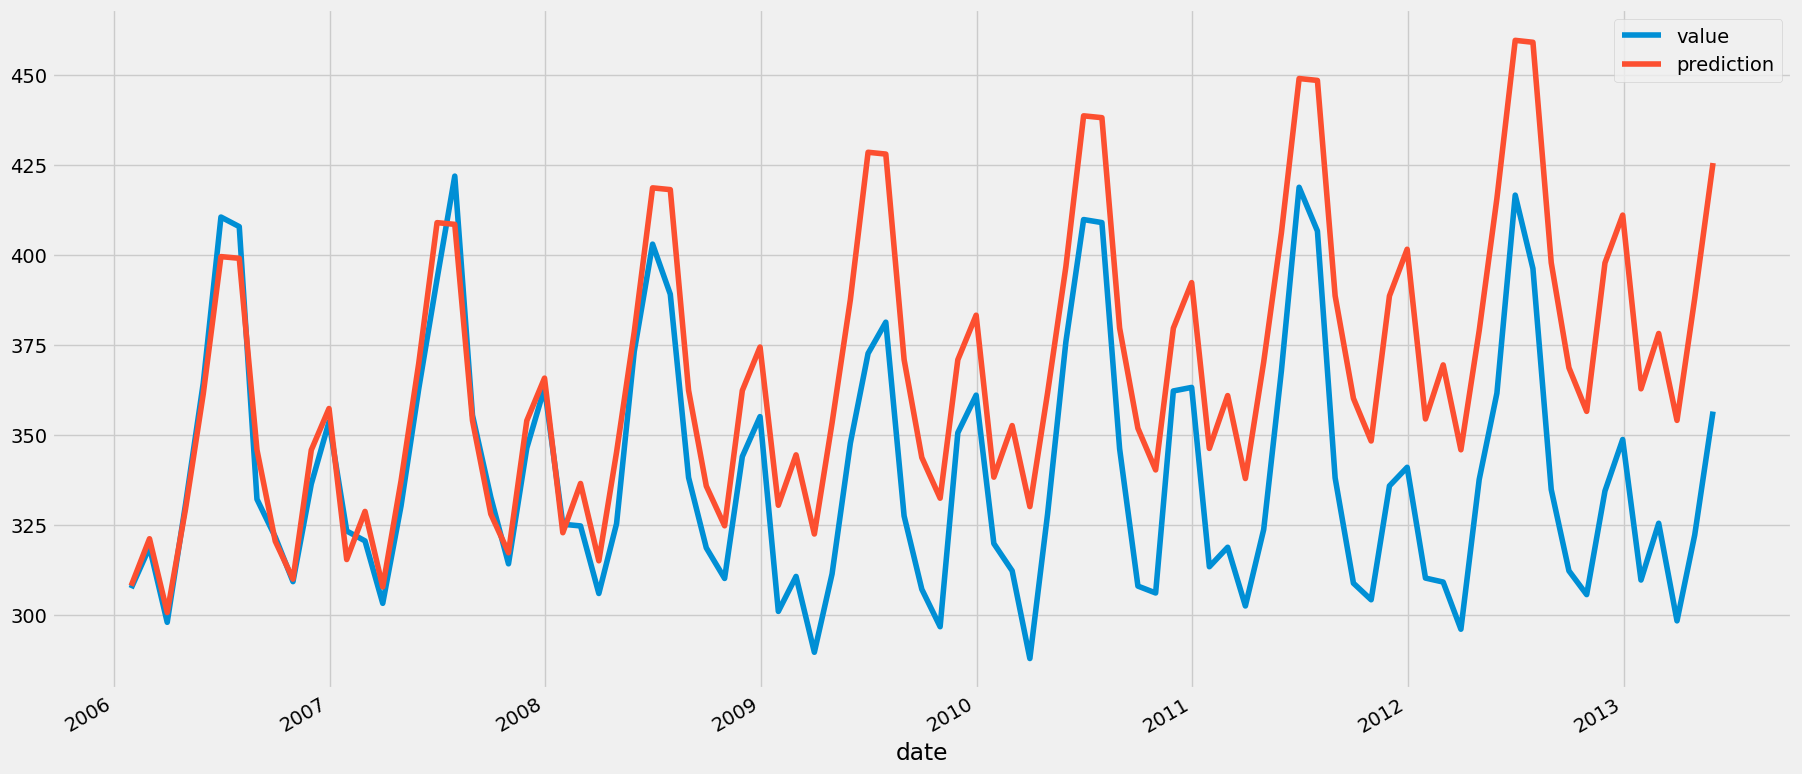

In [45]:

xvalid['prediction'] = prediction
xvalid.plot()

The code adds the forecasted values as a new column to your validation DataFrame (`xvalid`) and then creates a plot showing both the actual values and the forecasts over time. 

*   `xvalid['prediction'] = prediction`:
    *   `xvalid['prediction']`: Creates a new column named 'prediction' in the `xvalid` DataFrame.
    *   `= prediction`: Assigns the forecasted values (stored in the `prediction` variable) to this new column.  Now, your validation DataFrame contains both the actual observed values ('value') and the corresponding predicted values ('prediction').

*   `xvalid.plot()`:
    *   `xvalid.plot()`: Creates a line plot of all numerical columns in the `xvalid` DataFrame. Since you have 'value' (the actual data) and 'prediction' (the forecasted data), Pandas will create a plot with two lines: one for the actual values and one for the predicted values.  The index of the DataFrame (which is the date/time) will be used as the x-axis.
